# Agregación de datos por categoría

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gender = ["Male", "Female"]
income_cat = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500 # tamaño del dataset
gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))


In [8]:
gender_data[1:10]

['Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female']

In [9]:
income_data[1:10]

['Poor',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Rich',
 'Rich',
 'Poor']

In [10]:
# Z -> N(0,1)
# N(m,s) -> m+s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [13]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    }
)

In [14]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,179.514357,38.354575,27.422894,18022.267671
1,Male,Poor,165.160125,61.653524,22.039982,18735.300358
2,Male,Middle Class,139.498120,71.300819,32.608946,20930.767807
3,Female,Middle Class,99.420220,80.412329,33.453004,19765.483997
4,Male,Rich,169.419939,87.317100,34.737537,21200.731805


## Agrupación de datos

In [16]:
grouped_gender = data.groupby("Gender")

In [17]:
grouped_gender.groups

{'Female': Int64Index([  0,   3,   6,   7,   8,   9,  13,  14,  17,  19,
             ...
             481, 482, 486, 487, 489, 490, 492, 493, 494, 497],
            dtype='int64', length=240),
 'Male': Int64Index([  1,   2,   4,   5,  10,  11,  12,  15,  16,  18,
             ...
             480, 483, 484, 485, 488, 491, 495, 496, 498, 499],
            dtype='int64', length=260)}

In [18]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female            Rich  179.514357  38.354575  27.422894  18022.267671
3    Female    Middle Class   99.420220  80.412329  33.453004  19765.483997
6    Female            Poor  150.385814  18.179467  41.676108  20086.475976
7    Female            Rich  138.988165  16.344850  44.666182  20046.596771
8    Female            Rich  177.102401  66.615389  15.713560  18406.251472
..      ...             ...         ...        ...        ...           ...
490  Female    Middle Class  137.985144  37.333559  34.927860  20037.299792
492  Female    Middle Class  118.343957  53.336781  13.199206  20552.161183
493  Female            Rich  195.296411  21.848592  35.430546  21414.141753
494  Female            Rich  174.999901  56.001101  54.427746  18089.602089
497  Female            Rich  183.990852  63.617646  46.218600  19053.392233

[240 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [19]:
grouped_gender.get_group("Female") ## Genera un dataframe

,Economic Status,Height,Weight,Age,Income
0,Rich,179.514357,38.354575,27.422894,18022.267671
3,Middle Class,99.420220,80.412329,33.453004,19765.483997
6,Poor,150.385814,18.179467,41.676108,20086.475976
7,Rich,138.988165,16.344850,44.666182,20046.596771
8,Rich,177.102401,66.615389,15.713560,18406.251472
...,...,...,...,...,...
490,Middle Class,137.985144,37.333559,34.927860,20037.299792
492,Middle Class,118.343957,53.336781,13.199206,20552.161183
493,Rich,195.296411,21.848592,35.430546,21414.141753
494,Rich,174.999901,56.001101,54.427746,18089.602089


In [20]:
# Agrupación por más de una categoría
double_group = data.groupby(["Gender", "Economic Status"])

In [21]:
len(double_group)

6

In [22]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
3    Female    Middle Class   99.420220   80.412329  33.453004  19765.483997
13   Female    Middle Class  100.645969   49.521381  15.869042  19131.794528
17   Female    Middle Class  165.582249   80.891896  35.645506  19481.166842
20   Female    Middle Class  169.666871   68.661432  39.818922  19496.101575
30   Female    Middle Class  137.155883   81.534657  16.990878  20311.026305
..      ...             ...         ...         ...        ...           ...
457  Female    Middle Class  164.989934   55.524088  44.926800  18765.400769
461  Female    Middle Class  160.925867   77.231771  14.698483  20332.073688
482  Female    Middle Class  158.687032  104.144953  21.400851  19550.695702
490  Female    Middle Class  137.985144   37.333559  34.927860  20037.299792
492  Female    Middle Class  118.343957   53.336781  13.199206  20552.161183

[77 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [23]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12187.641874  5073.801290  2295.249667  1.524721e+06
       Poor             10616.199808  4349.048132  2061.297103  1.358002e+06
       Rich             15018.802112  6327.844272  2770.342451  1.886807e+06
Male   Middle Class     14809.010799  5961.389312  2708.004452  1.823966e+06
       Poor             13419.121809  4940.069687  2800.106594  1.693183e+06
       Rich             13549.789136  5134.977522  2386.306115  1.619621e+06

In [24]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     158.281063  65.893523  29.808437  19801.577343
       Poor             156.120585  63.956590  30.313193  19970.621698
       Rich             158.092654  66.608887  29.161499  19861.131171
Male   Middle Class     160.967509  64.797710  29.434831  19825.720458
       Poor             156.036300  57.442671  32.559379  19688.173399
       Rich             165.241331  62.621677  29.101294  19751.478629

In [26]:
double_group.size() # para saber cuántos elementos hay de cada clase

Gender  Economic Status
Female  Middle Class       77
        Poor               68
        Rich               95
Male    Middle Class       92
        Poor               86
        Rich               82
dtype: int64

In [27]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      77.0  158.281063  30.403091   75.984950  137.985144   
       Poor              68.0  156.120585  29.345297   91.662234  138.935629   
       Rich              95.0  158.092654  29.537832   77.616169  137.337355   
Male   Middle Class      92.0  160.967509  28.412029  108.292361  136.766762   
       Poor              86.0  156.036300  24.522850   97.141846  140.845515   
       Rich              82.0  165.241331  32.258487   65.637325  145.875792   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     161.109750  175.068261  229.846408   77.0  65.893523   
       Poor             155.005213  175.446276  217.527317   68.0  63.956590   
       Rich             160.595606  179.312922  229.045293   95.0  66.608887   
Male   Middle Class     163.278633  183.483605  219.163580   92.0  64.797710   
       Poor             156.022620  171.348286  229.422203   86.0  57.442671   
       Rich             164.137124  185.295783  229.881434   82.0  62.621677   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  35.645506  67.435065   77.0  19801.577343   
       Poor             ...  39.941896  62.412680   68.0  19970.621698   
       Rich             ...  35.274611  57.718773   95.0  19861.131171   
Male   Middle Class     ...  37.742394  61.670325   92.0  19825.720458   
       Poor             ...  40.791258  69.015219   86.0  19688.173399   
       Rich             ...  37.686441  49.680205   82.0  19751.478629   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class      935.486735  18053.650649  19030.528291  19765.727578   
       Poor             1007.625190  18048.008113  19202.570598  20152.131637   
       Rich             1028.365614  18022.267671  18936.544146  19948.082461   
Male   Middle Class     1128.388413  18007.516806  18766.529802  19787.268586   
       Poor             1043.616400  18003.750674  18731.334748  19750.491330   
       Rich             1041.690718  18009.175435  18868.236751  19801.451711   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20552.161183  21452.454005  
       Poor             20723.027498  21498.539299  
       Rich             20713.241809  21458.228435  
Male   Middle Class     20828.698049  21484.098542  
       Poor             20508.645226  21485.266562  
       Rich             20722.553568  21472.033388  

[6 rows x 32 columns]

In [29]:
grouped_income = double_group["Income"]

In [30]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      77.0  19801.577343   935.486735  18053.650649   
       Poor              68.0  19970.621698  1007.625190  18048.008113   
       Rich              95.0  19861.131171  1028.365614  18022.267671   
Male   Middle Class      92.0  19825.720458  1128.388413  18007.516806   
       Poor              86.0  19688.173399  1043.616400  18003.750674   
       Rich              82.0  19751.478629  1041.690718  18009.175435   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19030.528291  19765.727578  20552.161183  21452.454005  
       Poor             19202.570598  20152.131637  20723.027498  21498.539299  
       Rich             18936.544146  19948.082461  20713.241809  21458.228435  
Male   Middle Class     18766.529802  19787.268586  20828.698049  21484.098542  
       Poor             18731.334748  19750.491330  20508.645226  21485.266562  
       Rich             18868.236751  19801.451711  20722.553568  21472.033388

In [31]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.524721e+06  29.808437  30.403091
       Poor             1.358002e+06  30.313193  29.345297
       Rich             1.886807e+06  29.161499  29.537832
Male   Middle Class     1.823966e+06  29.434831  28.412029
       Poor             1.693183e+06  32.559379  24.522850
       Rich             1.619621e+06  29.101294  32.258487

In [32]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:np.mean(h)/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.808437  5.240223
       Poor             30.313193  5.359678
       Rich             29.161499  5.380603
Male   Middle Class     29.434831  5.696514
       Poor             32.559379  6.400213
       Rich             29.101294  5.153937

In [33]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12187.641874  158.281063  30.403091  5073.801290   
       Poor             10616.199808  156.120585  29.345297  4349.048132   
       Rich             15018.802112  158.092654  29.537832  6327.844272   
Male   Middle Class     14809.010799  160.967509  28.412029  5961.389312   
       Poor             13419.121809  156.036300  24.522850  4940.069687   
       Rich             13549.789136  165.241331  32.258487  5134.977522   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     65.893523  22.682952  2295.249667  29.808437   
       Poor             63.956590  22.730836  2061.297103  30.313193   
       Rich             66.608887  24.714077  2770.342451  29.161499   
Male   Middle Class     64.797710  27.137759  2708.004452  29.434831   
       Poor             57.442671  23.385743  2800.106594  32.559379   
       Rich             62.621677  25.910736  2386.306115  29.101294   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.605599  1.524721e+06  19801.577343   935.486735  
       Poor             13.970615  1.358002e+06  19970.621698  1007.625190  
       Rich             11.517527  1.886807e+06  19861.131171  1028.365614  
Male   Middle Class     12.406654  1.823966e+06  19825.720458  1128.388413  
       Poor             12.740736  1.693183e+06  19688.173399  1043.616400  
       Rich             11.002602  1.619621e+06  19751.478629  1041.690718

In [34]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.240223  2.924029  2.585296  21.305941
       Poor             5.359678  2.834568  2.185915  19.966853
       Rich             5.380603  2.709478  2.545356  19.415756
Male   Middle Class     5.696514  2.400816  2.385504  17.666218
       Poor             6.400213  2.470718  2.570522  18.975983
       Rich             5.153937  2.431696  2.661223  19.077666

## Filtrado de datos

In [36]:
double_group["Age"].filter(lambda x: x.sum() > 2400)

0      27.422894
1      22.039982
2      32.608946
7      44.666182
8      15.713560
         ...    
495    20.595510
496    32.025641
497    46.218600
498    30.473864
499    16.171426
Name: Age, Length: 273, dtype: float64

### Transformación de variables

In [39]:
zscore = lambda x : (x - x.mean())/x.std()

In [44]:
z_group = double_group.transform(zscore)

(array([  4.,  15.,  58.,  88., 123., 111.,  56.,  33.,  10.,   2.]),
 array([-2.87488902, -2.26318913, -1.65148924, -1.03978935, -0.42808946,
         0.18361043,  0.79531032,  1.40701021,  2.01871011,  2.63041   ,
         3.24210989]),
 <a list of 10 Patch objects>)

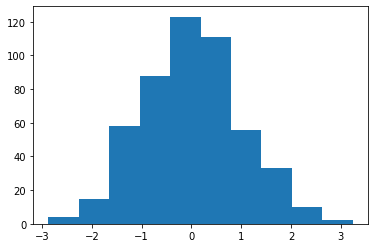

In [45]:
plt.hist(z_group["Age"])

In [46]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [47]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,179.514357,38.354575,27.422894,18022.267671
1,165.160125,61.653524,22.039982,18735.300358
2,139.498120,71.300819,32.608946,20930.767807
3,99.420220,80.412329,33.453004,19765.483997
4,169.419939,87.317100,34.737537,21200.731805
...,...,...,...,...
495,159.122530,58.377588,20.595510,21270.173171
496,187.549657,44.861979,32.025641,21403.600864
497,183.990852,63.617646,46.218600,19053.392233
498,163.318747,64.147366,30.473864,20534.460340


## Operaciones diversas muy útiles

In [48]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,179.514357,38.354575,27.422894,18022.267671
1,Male,Poor,165.160125,61.653524,22.039982,18735.300358
2,Male,Middle Class,139.498120,71.300819,32.608946,20930.767807
3,Female,Middle Class,99.420220,80.412329,33.453004,19765.483997
4,Male,Rich,169.419939,87.317100,34.737537,21200.731805
6,Female,Poor,150.385814,18.179467,41.676108,20086.475976


In [49]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
476,Female,Poor,128.550534,50.676361,32.427030,18611.266861
491,Male,Rich,180.341639,87.075143,29.402407,20816.519081
492,Female,Middle Class,118.343957,53.336781,13.199206,20552.161183
496,Male,Middle Class,187.549657,44.861979,32.025641,21403.600864
497,Female,Rich,183.990852,63.617646,46.218600,19053.392233
499,Male,Poor,174.558787,37.890017,16.171426,19839.530553


In [51]:
double_group.nth(32) ## Devuelve el elemento n-ésimo, siempre que exista ese elemento

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     168.227396  64.530786  25.050059  18919.297155
       Poor             163.326107  94.551615  19.647130  19342.455369
       Rich             189.850254  18.507157  46.076380  19244.832471
Male   Middle Class     165.831241  95.474195  32.157220  19620.717612
       Poor             100.092926  50.521420  34.727492  21346.967478
       Rich             191.977497  92.723923  47.654711  20951.532719

In [52]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Rich             179.111488  57.972903  34.685487  19926.456763
Male   Middle Class     126.504801  42.629935  25.790132  18127.586403
       Poor             148.893708  46.930005  21.361935  19740.891940

In [53]:
data_sorted = data.sort_values(["Age", "Income"])

In [54]:
data_sorted

,Gender,Economic Status,Height,Weight,Age,Income
489,Female,Rich,161.843292,63.569770,-3.950113,18397.922315
259,Male,Poor,186.023489,39.592676,-1.421138,20170.566965
351,Male,Poor,150.947930,64.443546,0.301168,18542.767819
212,Male,Middle Class,194.042752,30.724607,2.368570,18394.367829
274,Female,Rich,145.248911,50.467029,2.921221,20028.003445
...,...,...,...,...,...,...
182,Male,Middle Class,195.049176,30.011078,61.670325,19500.077733
231,Female,Poor,141.095579,80.305587,62.412680,20440.544370
49,Male,Poor,195.592797,105.052444,65.234638,18730.012878
220,Female,Middle Class,202.613023,69.679860,67.435065,21452.454005


In [55]:
age_grouped = data_sorted.groupby("Gender")
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
489,Female,Rich,161.843292,63.569770,-3.950113,18397.922315
259,Male,Poor,186.023489,39.592676,-1.421138,20170.566965
351,Male,Poor,150.947930,64.443546,0.301168,18542.767819
212,Male,Middle Class,194.042752,30.724607,2.368570,18394.367829
274,Female,Rich,145.248911,50.467029,2.921221,20028.003445
192,Male,Middle Class,170.648843,19.094623,2.941326,20608.285562
26,Male,Middle Class,191.498822,3.345398,3.344799,19986.065149
41,Female,Poor,118.838114,29.567254,3.594733,19946.170228
362,Female,Rich,168.354700,111.875599,3.734114,19333.001133
207,Female,Poor,190.813116,34.839951,4.586050,21365.504947


In [56]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
220,Female,Middle Class,202.613023,69.67986,67.435065,21452.454005
121,Male,Poor,181.285801,39.21832,69.015219,21351.093902


# Conjunto de entrenamiento y conjunto de testing

In [114]:
import pandas as pd

In [59]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
len(data)

3333

### Dividir utilizando la distribución normal

In [60]:
a = np.random.randn(len(data))

(array([ 13.,  37., 185., 501., 844., 867., 579., 243.,  55.,   9.]),
 array([-3.47974106, -2.79049131, -2.10124155, -1.4119918 , -0.72274204,
        -0.03349228,  0.65575747,  1.34500723,  2.03425698,  2.72350674,
         3.4127565 ]),
 <a list of 10 Patch objects>)

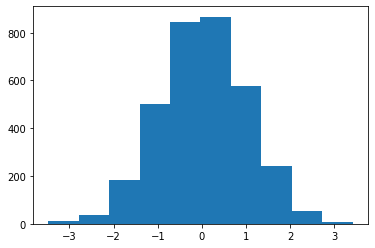

In [61]:
plt.hist(a)

In [123]:
check=a<0.8

In [124]:
len(check)
check

array([False,  True,  True, ..., False,  True,  True])

(array([ 748.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2585.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

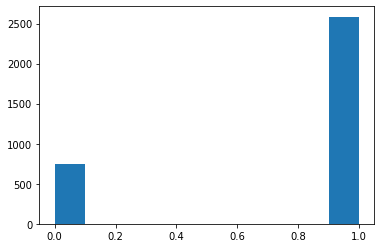

In [125]:
plt.hist(check*1)

In [128]:
training = data[check]
testing = data[~check]

In [129]:
len(training)

2585

In [130]:
len(testing)

748

## Con la librería sklearn

sklearn == scikit learn

Datos no reproducibles

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
train, test = train_test_split(data, test_size = 0.2) 
#divide el dataset, le indicamos que el tamaño del conjunto de test es 0.2 = 20%

In [133]:
len(train)

2666

In [134]:
len(test)

667

## Usando una función shuffle


In [135]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [137]:
import sklearn

In [139]:
data = sklearn.utils.shuffle(data)

In [140]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data=data[cut_id+1:]

In [141]:
len(train_data)

2499

In [142]:
len(test_data)

833